In [5]:

import numpy as np
import pandas as pd
import io
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score

pd.options.display.max_columns = None


from google.colab import files
uploaded = files.upload()


Saving fighters.csv to fighters.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded["fighters.csv"]))
df.head()

,name,wins,looses,draws,ko_rate,stance,age,height,reach,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Unknown,Unknown,Germany


DROP THE COLUMN "COUNTRY" 

In [7]:
df.drop('country',inplace=True,axis=1)


 REPLACE THE "UNKNOWN" WITH 0  IN THE ENTIRETY OF THE DATASET AND WE CLEAN SOME COLUMNS


In [8]:
df=df.replace('Unknown','0')
df['ko_rate'] = df['ko_rate'].str.replace('%', ' ')

columns_to_convert = ['wins', 'looses', 'draws', 'ko_rate', 'age']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df[columns_to_convert] = df[columns_to_convert].fillna(0.0)
df[columns_to_convert] = df[columns_to_convert].astype(float)


FROM THE "HEIGHT" THE METERS ARE EXTRACTED

In [9]:
def extract_meters(s):
    if s == '0':
        return 0.0
    else:
        try:
            start = s.index("(") + 1
            end = s.index(" m)")
            return float(s[start:end].strip())
        except ValueError:
            return None

df['height'] = df['height'].apply(extract_meters)


FROM THE "REACH"  THE CENTIMETERS ARE EXTRACTED

In [10]:
def extract_centimeters(s):
 if s == "0":
  return 0.0
 else:
  start = s.find("(") + 1
  end = s.find(" ", start)
  cm = float(s[start:end])
  return cm
df["reach"] = df["reach"].apply(extract_centimeters)




 THE "STANCE" IS ENCODED

In [11]:
df1=pd.get_dummies(df,columns=['stance'],drop_first=True)


BOXPLOT OF COLUMN AGE

221.0

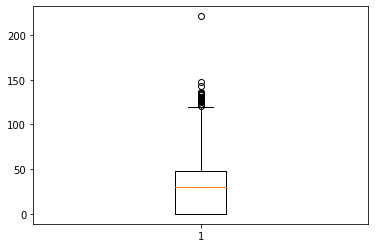

In [12]:
data=df1['age']
plt.boxplot(data)
data.max()

THE AGES THAT ARE OVER 60 ARE REPLACED WITH THE MEAN OF THE REST OF THE AGES




In [13]:
k = df1['age']
S_age = k[(k <= 60.0) & (k > 0.0)].sum()
C_age = k[(k <= 60.0) & (k > 0.0)].count()

MEAN_AGE=S_age/C_age
MEAN_AGE=round(MEAN_AGE,1)
df1['age'] = df1['age'].apply(lambda x: MEAN_AGE if x >= 60 else x)
df1['age'] = df1['age'].apply(lambda x: MEAN_AGE if x <= 10 else x)
df1

,name,wins,looses,draws,ko_rate,age,height,reach,stance_Orthodox,stance_Southpaw
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0
3,Saul Alvarez,54.0,1.0,2.0,63.2,32.0,1.75,179.0,1,0
4,Sukru Altay,0.0,0.0,0.0,0.0,38.0,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,28.0,1.75,0.0,1,0
2756,arthur abraham,47.0,6.0,0.0,56.6,42.0,1.75,183.0,1,0
2757,victor abraham,24.0,15.0,0.0,20.5,36.1,1.74,178.0,1,0
2758,reiya abe,16.0,2.0,1.0,42.1,29.0,0.00,0.0,0,1


SOME PLOTS

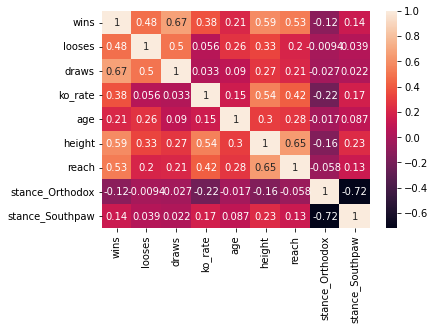

In [14]:
corr_matrix=df1.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

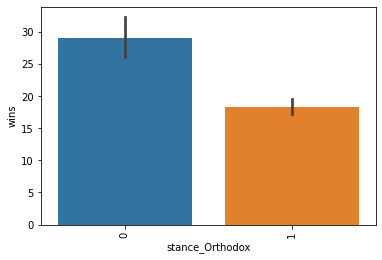

In [ ]:
'''sn.barplot(x = df1['stance_Orthodox'], y = df1['wins'])
plt.xticks(rotation = 90)
plt.show()'''

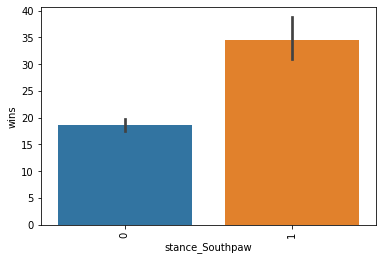

In [ ]:
'''sn.barplot(x = df1['stance_Southpaw'], y = df1['wins'])
plt.xticks(rotation = 90)
plt.show()'''

 A NEW COLUMN WITH THE LAST NAMES OF THE PLAYERS IS CREATED

In [15]:
def extract_last_name(name):
    if ' JR' in name.upper():
        name = name[:-3]
    return name.split()[-1]
df1['last_name'] = df1['name'].apply(extract_last_name)
df1['last_name'] = df1['last_name'].str.upper()



In [16]:


from google.colab import files
uploaded = files.upload()

Saving popular_matches.csv to popular_matches.csv


In [17]:
popular_matches = pd.read_csv(io.BytesIO(uploaded["popular_matches.csv"]))


 COLUMNS "DATE"  AND "PLACE" ARE REMOVED  AS THEY DO NOT PLAY A ROLE IN THE  PREDICTIONS




In [18]:
popular_matches=popular_matches.drop(columns=['date','place'])

REPLACE THE MISSING VALUES WITH THE MEAN OF THE REST

In [19]:
popular_matches['opponent_1'] = popular_matches['opponent_1'].str.upper()
popular_matches['opponent_2'] = popular_matches['opponent_2'].str.upper()



list2=[ 'opponent_1_estimated_punch_power',
        'opponent_2_estimated_punch_power',
        'opponent_1_estimated_punch_resistance',
        'opponent_2_estimated_punch_resistance',
        'opponent_1_estimated_ability_to_take_punch',
        'opponent_2_estimated_ability_to_take_punch', 'opponent_1_rounds_boxed',
        'opponent_2_rounds_boxed', 'opponent_1_round_ko_percentage',
        'opponent_2_round_ko_percentage', 'opponent_1_has_been_ko_percentage',
        'opponent_2_has_been_ko_percentage', 'opponent_1_avg_weight',
        'opponent_2_avg_weight' ]


for i in list2 : 
  mean_value=popular_matches[i].mean()
  popular_matches.fillna(value=round(mean_value,2), inplace=True)
popular_matches[['opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_rounds_boxed']] = popular_matches[['opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_rounds_boxed']].astype(float)


CREATE COLUMNS WITH THE LAST NAMES OF THE ATHLETES

In [20]:

popular_matches['last_name_1'] = popular_matches['opponent_1'].apply(extract_last_name)
popular_matches['last_name_2'] = popular_matches['opponent_2'].apply(extract_last_name)

FIND THE WINNER 

In [21]:
matrix =popular_matches['verdict']


j=0
k=0
for i in matrix :
  
  all_words = i.split()
  first_word= all_words[0]
  

  matrix[j]=first_word
  j=j+1

def take_the_opponents():
    list_name_1, list_name_2 = [], []
    for i in range(popular_matches.shape[0]):
        name_opponent_12 = popular_matches['last_name_1'][i]
        name_opponent_23 = popular_matches['last_name_2'][i]

        list_name_1.append(name_opponent_12)
        list_name_2.append(name_opponent_23)
    
    return list_name_1, list_name_2

list_name_opponent_12, list_name_opponent_23 = take_the_opponents()

<ipython-input-21-7b4ae214fa5d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix[j]=first_word


CREATE THE NEW COLUMNS THAT WILL BE A PART OF THE FINAL DATASET

In [22]:


list_columns_1_str = ['wins_1', 'looses_1', 'draws_1', 'ko_rate_1', 'age_1','height_1', 'reach_1', 'stance_Orthodox_1', 'stance_Southpaw_1']

list_columns_2_str = ['wins_2', 'looses_2', 'draws_2', 'ko_rate_2', 'age_2','height_2', 'reach_2', 'stance_Orthodox_2', 'stance_Southpaw_2']

list_columns_1_str
    
   

['wins_1',
 'looses_1',
 'draws_1',
 'ko_rate_1',
 'age_1',
 'height_1',
 'reach_1',
 'stance_Orthodox_1',
 'stance_Southpaw_1']

CONNECTION OF THE DATASETS

In [23]:


def features_1(name):
    row = df1.loc[df1['last_name'] ==name]
    row_values = row[row.columns].values

    if row_values.shape[0] == 1:
        return row_values[0][1:]
    else:
        return np.zeros(9, dtype=float)
def full_DATA():
    columns_1 = [features_1(name) for name in list_name_opponent_12]
    columns_2 = [features_1(name) for name in list_name_opponent_23]
    
    for i in range(len(list_columns_1_str)):
        popular_matches[list_columns_1_str[i]] = [col[i] for col in columns_1]
    
    for i in range(len(list_columns_2_str)):
        popular_matches[list_columns_2_str[i]] = [col[i] for col in columns_2]
    
    return popular_matches
df1_and_pm=full_DATA()
df1_and_pm    



,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,last_name_1,last_name_2,wins_1,looses_1,draws_1,ko_rate_1,age_1,height_1,reach_1,stance_Orthodox_1,stance_Southpaw_1,wins_2,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,stance_Orthodox_2,stance_Southpaw_2
0,VASYL LOMACHENKO,LUKE CAMPBELL,72.0,72.0,73.90,60.50,78.0,73.00,119.0,130.00,8.40,12.31,0.00,0.00,127.11,135.24,Lomachenko,LOMACHENKO,CAMPBELL,14.0,2.0,0.0,62.5,34.0,1.68,166.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,ORLANDO FIORDIGIGLIO,SAM EGGINGTON,59.0,59.0,55.40,54.50,68.0,66.00,200.0,177.00,6.50,8.47,3.03,6.25,152.50,148.93,Eggington,FIORDIGIGLIO,EGGINGTON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,28.0,7.0,0.0,48.6,28.0,1.80,0.0,1.0,0.0
2,GENNADY GOLOVKIN,SERGIY DEREVYANCHENKO,82.0,82.0,68.00,63.30,84.0,75.00,200.0,81.00,17.50,12.35,0.00,0.00,159.66,164.04,Golovkin,GOLOVKIN,DEREVYANCHENKO,41.0,1.0,1.0,83.7,40.0,1.79,178.0,1.0,0.0,13.0,2.0,0.0,66.7,36.0,1.70,171.0,1.0,0.0
3,CHAZZ WITHERSPOON,OLEKSANDR USYK,69.0,69.0,59.60,68.90,79.0,80.00,182.0,125.00,15.93,9.60,4.76,66.29,292.71,200.10,Usyk,WITHERSPOON,USYK,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.0,0.0,0.0,72.2,35.0,1.90,0.0,0.0,1.0
4,EBENEZER TETTEH,DANIEL DUBOIS,46.0,46.0,66.29,44.40,50.0,69.00,38.0,39.00,23.68,30.77,0.00,0.00,178.67,230.38,Dubois,TETTEH,DUBOIS,9.0,1.0,0.0,90.0,36.1,0.00,0.0,0.0,0.0,15.0,1.0,0.0,87.5,25.0,1.94,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,THEOPHILUS TETTEH,ANTHONY FOWLER,56.0,56.0,41.70,45.70,67.0,60.00,147.0,65.00,6.12,13.85,8.00,66.29,154.88,155.90,Fowler,TETTEH,FOWLER,9.0,1.0,0.0,90.0,36.1,0.00,0.0,0.0,0.0,14.0,1.0,0.0,73.3,31.0,1.80,0.0,1.0,0.0
148,DEONTAY WILDER,TYSON FURY,88.0,88.0,63.90,66.90,83.0,86.00,143.0,186.00,28.67,10.75,0.00,0.00,242.40,247.50,Fury,WILDER,FURY,42.0,1.0,1.0,93.2,36.0,2.00,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
149,SCOTT QUIGG,JONO CARROLL,75.0,75.0,63.40,52.20,76.0,63.00,200.0,122.00,13.00,66.29,0.00,0.00,124.80,133.43,Carroll,QUIGG,CARROLL,35.0,3.0,2.0,65.0,33.0,1.73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
150,JOE HUGHES,SAM MAXWELL,57.0,57.0,52.30,66.29,65.0,66.29,182.0,66.29,3.85,66.29,0.00,0.00,141.86,66.29,Maxwell,HUGHES,MAXWELL,16.0,4.0,2.0,8.7,32.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1.0,0.0


THE NEW DATASET

In [ ]:
df1_and_pm  

,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,last_name_1,last_name_2,wins_1,looses_1,draws_1,ko_rate_1,age_1,height_1,reach_1,stance_Orthodox_1,stance_Southpaw_1,wins_2,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,stance_Orthodox_2,stance_Southpaw_2
0,VASYLLOMACHENKO,LUKECAMPBELL,72.0,72.0,73.90,60.50,78.0,73.00,119.0,130.00,8.40,12.31,0.00,0.00,127.11,135.24,Lomachenko,LOMACHENKO,CAMPBELL,14.0,2.0,0.0,62.5,34.0,1.68,166.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,ORLANDOFIORDIGIGLIO,SAMEGGINGTON,59.0,59.0,55.40,54.50,68.0,66.00,200.0,177.00,6.50,8.47,3.03,6.25,152.50,148.93,Eggington,FIORDIGIGLIO,EGGINGTON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,28.0,7.0,0.0,48.6,28.0,1.80,0.0,1.0,0.0
2,GENNADYGOLOVKIN,SERGIYDEREVYANCHENKO,82.0,82.0,68.00,63.30,84.0,75.00,200.0,81.00,17.50,12.35,0.00,0.00,159.66,164.04,Golovkin,GOLOVKIN,DEREVYANCHENKO,41.0,1.0,1.0,83.7,40.0,1.79,178.0,1.0,0.0,13.0,2.0,0.0,66.7,36.0,1.70,171.0,1.0,0.0
3,CHAZZWITHERSPOON,OLEKSANDRUSYK,69.0,69.0,59.60,68.90,79.0,80.00,182.0,125.00,15.93,9.60,4.76,66.29,292.71,200.10,Usyk,WITHERSPOON,USYK,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.0,0.0,0.0,72.2,35.0,1.90,0.0,0.0,1.0
4,EBENEZERTETTEH,DANIELDUBOIS,46.0,46.0,66.29,44.40,50.0,69.00,38.0,39.00,23.68,30.77,0.00,0.00,178.67,230.38,Dubois,TETTEH,DUBOIS,9.0,1.0,0.0,90.0,0.0,0.00,0.0,0.0,0.0,15.0,1.0,0.0,87.5,25.0,1.94,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,THEOPHILUSTETTEH,ANTHONYFOWLER,56.0,56.0,41.70,45.70,67.0,60.00,147.0,65.00,6.12,13.85,8.00,66.29,154.88,155.90,Fowler,TETTEH,FOWLER,9.0,1.0,0.0,90.0,0.0,0.00,0.0,0.0,0.0,14.0,1.0,0.0,73.3,31.0,1.80,0.0,1.0,0.0
148,DEONTAYWILDER,TYSONFURY,88.0,88.0,63.90,66.90,83.0,86.00,143.0,186.00,28.67,10.75,0.00,0.00,242.40,247.50,Fury,WILDER,FURY,42.0,1.0,1.0,93.2,36.0,2.00,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
149,SCOTTQUIGG,JONOCARROLL,75.0,75.0,63.40,52.20,76.0,63.00,200.0,122.00,13.00,66.29,0.00,0.00,124.80,133.43,Carroll,QUIGG,CARROLL,35.0,3.0,2.0,65.0,33.0,1.73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
150,JOEHUGHES,SAMMAXWELL,57.0,57.0,52.30,66.29,65.0,66.29,182.0,66.29,3.85,66.29,0.00,0.00,141.86,66.29,Maxwell,HUGHES,MAXWELL,16.0,4.0,2.0,8.7,32.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0


CREATE A HEATMAP

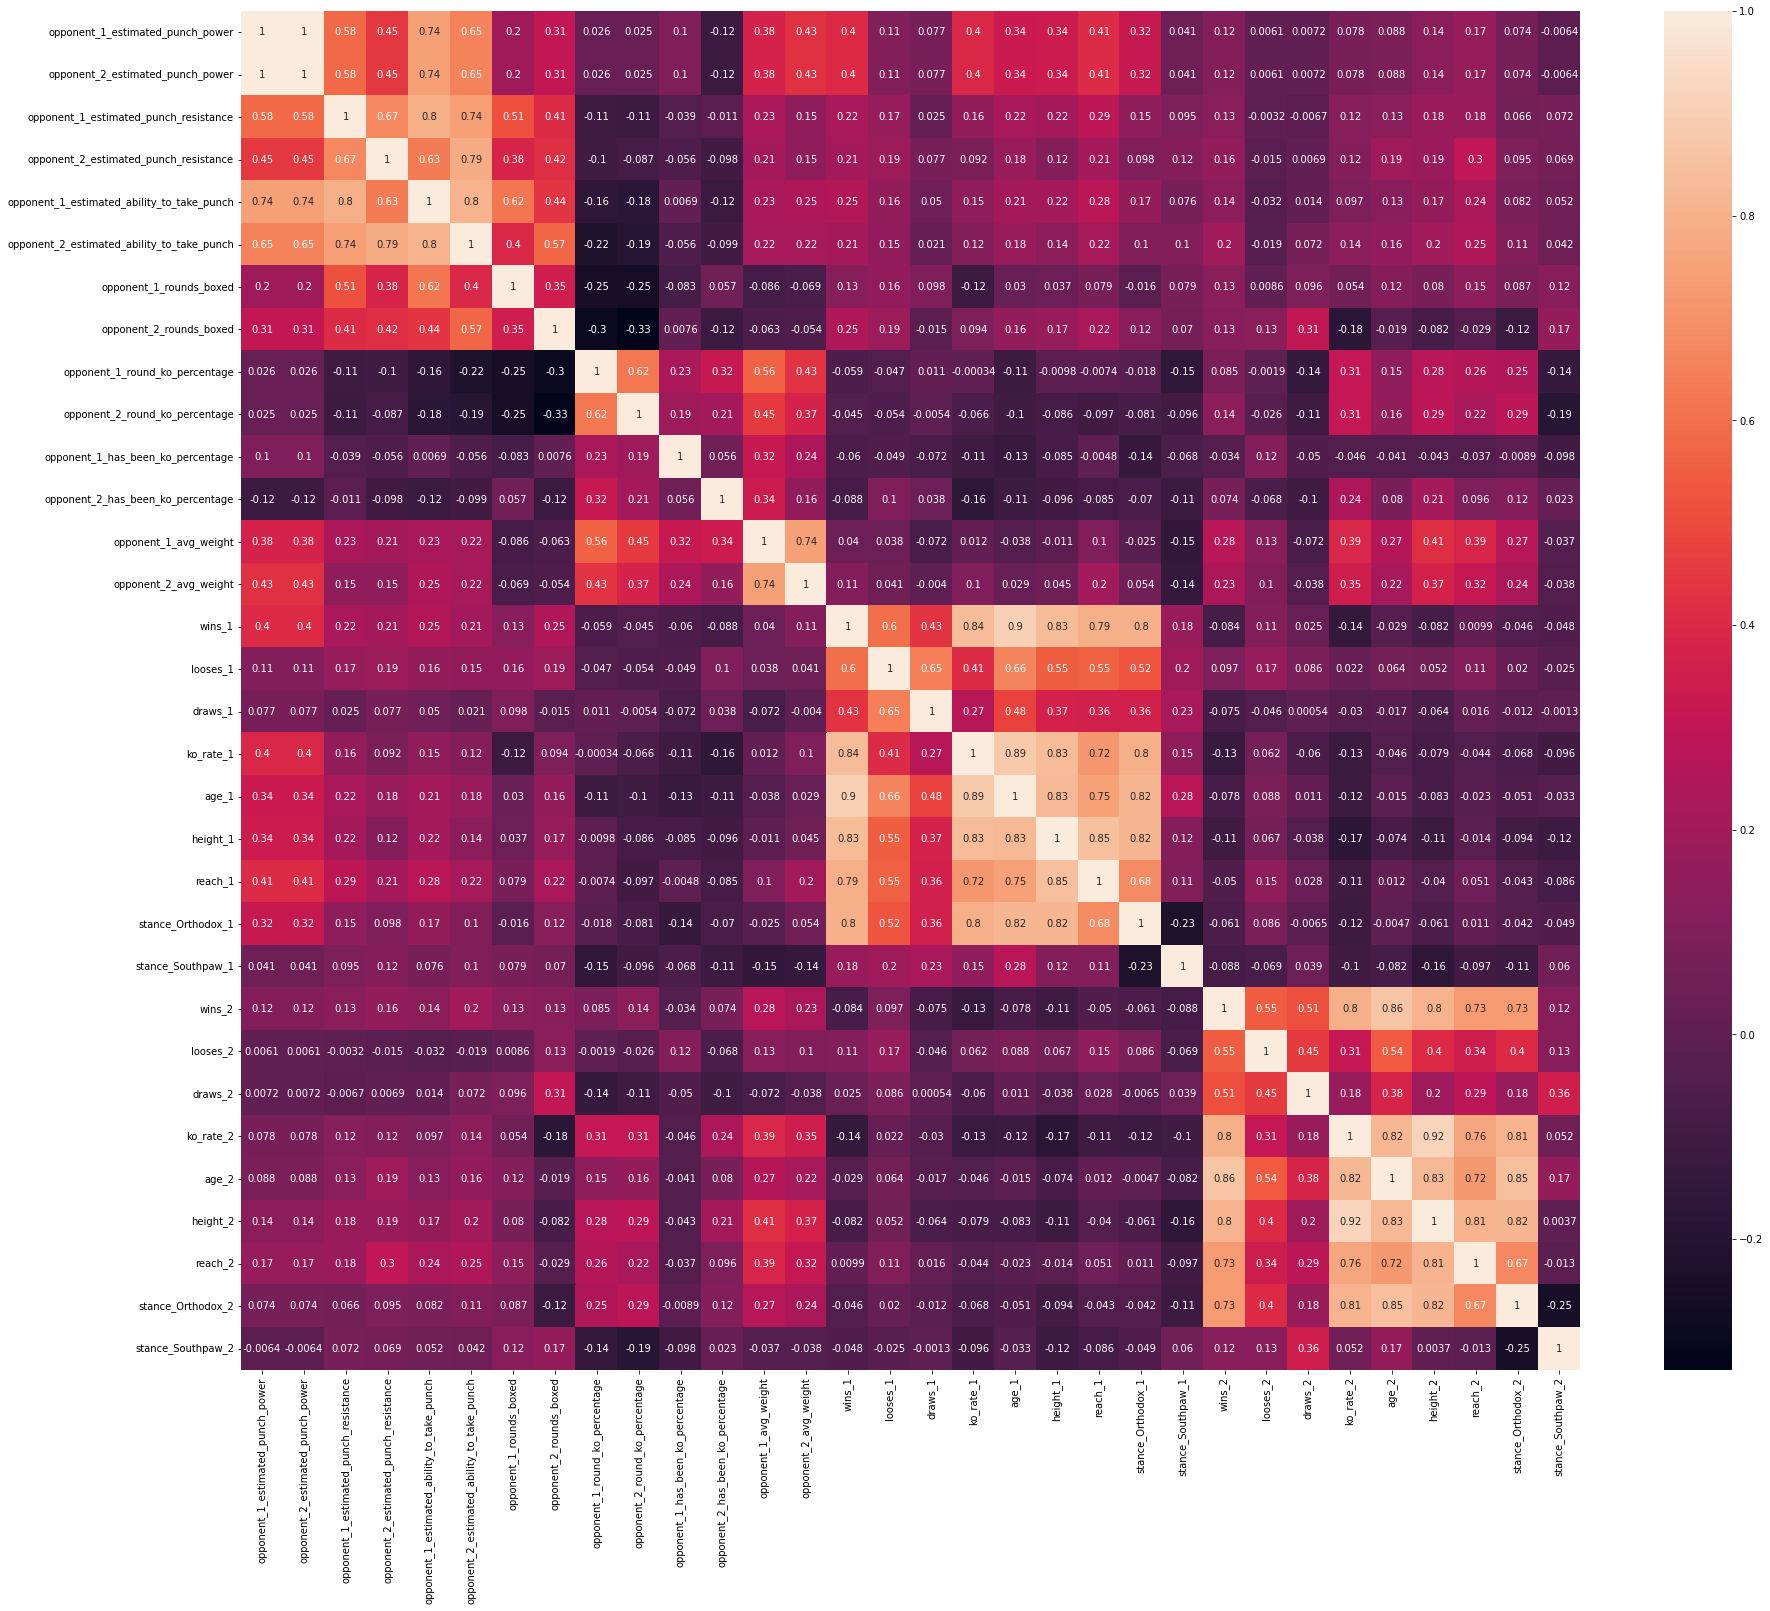

In [24]:
correlations = df1_and_pm.corr()
plt.figure(figsize=(30,25))
sn.heatmap(correlations, annot=True)
plt.show()

In [25]:
df1_and_pm['verdict'] = df1_and_pm['verdict'].str.upper()

FIND THE UNIQUE VALUES OF COLUMN VERDICT

In [26]:



unique_values =df1_and_pm["verdict"].unique()

print(unique_values)


['LOMACHENKO' 'EGGINGTON' 'GOLOVKIN' 'USYK' 'DUBOIS' 'SPENCE' 'HANEY'
 'FURY' 'POVETKIN' 'BETERBIEV' 'TAYLOR' 'FITZGERALD' 'CHISORA' 'OLATUNJI'
 'DRAW' 'ALVAREZ' 'TYSON' 'ALI' 'LEONARD' 'MAYWEATHER' 'WILDER' 'JOSHUA'
 'RUIZ' 'SMITH' 'UNKNOWN' 'PERALTA' 'PARKER' 'LINARES' 'BELLEW' 'WARD'
 'CLEVERLY' 'PORTER' 'FRAMPTON' 'INOUE' 'CAMPBELL' 'WARRINGTON' 'WHYTE'
 'DIXON' 'PRICE' 'PACQUIAO' 'GETHING' 'EUBANK' 'BENAVIDEZ' 'DAVIES'
 'FEIGENBUTZ' 'KOVALEV' 'CHARLO' 'MARTIN' 'GARCIA' 'FOWLER' 'CARROLL'
 'MAXWELL' 'LOPEZ']


In [ ]:

df1_and_pm = df1_and_pm[df1_and_pm['verdict'] != 'Unknown']





TURN THE VALUES OF THE COLUMN VERDICT FROM  CATEGORICAL TO NUMERICAL

In [27]:
def determine_winner(row):
    verdict = row['verdict']
    opponent1 = row['last_name_1']
    opponent2 = row['last_name_2']
    if verdict == opponent2:
        return 2
    elif verdict == opponent1:
        return 1
    else: 
        return 0
       
     
  

df1_and_pm['winner'] = df1_and_pm.apply(determine_winner, axis=1)



KEEP THE LABELS

In [28]:
winner_2 = df1_and_pm.pop('winner')


REMOVE ALL THE COLUMNS  WITH CATEGORICAL VALUES

In [29]:
df1_and_pm=popular_matches.drop(columns=['last_name_1', 'last_name_2', 'opponent_1', 'opponent_2','verdict'])


STANDARDIZE

In [41]:
scaler = StandardScaler()

df1_and_pm_s = scaler.fit_transform(df1_and_pm)

MODEL:RANDOM_FOREST_CLASSIFIER( PARAMETERS : n_estimators = 1000, max_depth = 3)

In [43]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 3)
x_train, x_test, y_train, y_test = train_test_split(df1_and_pm_s, winner_2, test_size = 0.3)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
errors = abs(y_pred - y_test)
accuracy = accuracy_score(y_test, y_pred)


print("RandomForestClassifier")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)


RandomForestClassifier
Train score: 0.8679245283018868
Test score: 0.7608695652173914
Accuracy: 0.7608695652173914


MODEL:RANDOM_FOREST_CLASSIFIER( PARAMETERS : n_estimators = 1000, max_depth = 5)

In [53]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 5)
x_train, x_test, y_train, y_test = train_test_split(df1_and_pm_s, winner_2, test_size = 0.3)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
errors = abs(y_pred - y_test)
accuracy = accuracy_score(y_test, y_pred)


print("RandomForestClassifier")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)


RandomForestClassifier
Train score: 0.9905660377358491
Test score: 0.6739130434782609
Accuracy: 0.6739130434782609


MODEL:RANDOM_FOREST_CLASSIFIER( PARAMETERS : n_estimators = 1000, max_depth = 2)

In [56]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 2)
x_train, x_test, y_train, y_test = train_test_split(df1_and_pm_s, winner_2, test_size = 0.3)
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
errors = abs(y_pred - y_test)
accuracy = accuracy_score(y_test, y_pred)


print("RandomForestClassifier")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)


RandomForestClassifier
Train score: 0.8207547169811321
Test score: 0.6739130434782609
Accuracy: 0.6739130434782609


XGBOOST CLASSIFIER(PARAMETERS :max_depth=2, learning_rate=0.001, n_estimators=100)

In [44]:
model = XGBClassifier(max_depth=2, learning_rate=0.001, n_estimators=100)


x_train, x_test, y_train, y_test = train_test_split(df1_and_pm_s, winner_2, test_size = 0.3, random_state = 15)

model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred_winner = model.predict(x_test)
accuracy = accuracy_score(y_test,  y_pred_winner)


print(" XGBClassifier")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)


 XGBClassifier
Train score: 0.8018867924528302
Test score: 0.6956521739130435
Accuracy: 0.6956521739130435


XGBOOST CLASSIFIER(PARAMETERS :max_depth=4, learning_rate=0.001, n_estimators=100)

In [45]:
model = XGBClassifier(max_depth=4, learning_rate=0.001, n_estimators=100)


x_train, x_test, y_train, y_test = train_test_split(df1_and_pm_s, winner_2, test_size = 0.3, random_state = 15)

model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred_winner = model.predict(x_test)
accuracy = accuracy_score(y_test,  y_pred_winner)


print(" XGBClassifier")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)

 XGBClassifier
Train score: 0.9716981132075472
Test score: 0.6739130434782609
Accuracy: 0.6739130434782609


XGBOOST CLASSIFIER(PARAMETERS :max_depth=2, learning_rate=0.003, n_estimators=1000)

In [59]:
model = XGBClassifier(max_depth=1, learning_rate=0.003, n_estimators=1000)


x_train, x_test, y_train, y_test = train_test_split(df1_and_pm_s, winner_2, test_size = 0.3, random_state = 15)

model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred_winner = model.predict(x_test)
accuracy = accuracy_score(y_test,  y_pred_winner)


print(" XGBClassifier")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)

 XGBClassifier
Train score: 0.7830188679245284
Test score: 0.5869565217391305
Accuracy: 0.5869565217391305


LINEAR REGRESSION

In [61]:

model=LinearRegression()


X_train, X_test, y_train, y_test = train_test_split(df1_and_pm_s, winner_2, test_size=0.2, random_state=42)


reg = model.fit(X_train, y_train)


y_pred = reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.3188654724083213
R^2 Score: -0.08663020916452768


DECISION_TREE_CLASSIFIER (PARAMETERS criterion = 'entropy',max_depth=2)




In [75]:
tree_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)

X_train, X_test, y_train, y_test = train_test_split(df1_and_pm_s, winner_2, test_size=0.3, random_state=42)



tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)


acc = accuracy_score(y_test, y_pred)

print("Test set score: {:.3f}".format(tree_classifier.score(X_test,y_test)))




Test set score: 0.761


DECISION_TREE_CLASSIFIER (PARAMETERS criterion = 'entropy',max_depth=2)


In [74]:
tree_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(df1_and_pm_s, winner_2, test_size=0.3, random_state=42)



tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)


acc = accuracy_score(y_test, y_pred)

print("Test set score: {:.3f}".format(tree_classifier.score(X_test,y_test)))


Test set score: 0.522
